In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [10]:
  df = pd.read_csv("reg_data.csv")

In [11]:
df

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 
from sklearn import linear_model

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
df.corr() #correlacion general de la base de datos 


,Salary,Age,Weight
Salary,1.000000,0.580216,-0.207958
Age,0.580216,1.000000,-0.321182
Weight,-0.207958,-0.321182,1.000000


In [13]:
df.columns

Index(['Gender', 'Salary', 'Age', 'Place', 'Weight', 'Company',
       'Academic_degree'],
      dtype='object')

In [18]:
df.dropna(inplace= True )
df  #dropear los datos inexistentes Nan

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500.0,33.0,Chicago,80.0,BMW,Bachelor
1,Female,1200.0,33.0,Chicago,82.5,Ford,No
2,Male,2200.0,34.0,New York,100.8,BMW,Bachelor
3,Male,2100.0,42.0,New York,90.0,BMW,Master
4,Female,1500.0,29.0,Chicago,67.0,Ford,Master
5,Female,1700.0,42.0,Washington,60.0,Ford,Master
6,Male,3000.0,50.0,Washington,77.0,Ford,No
7,Male,3000.0,55.0,Washington,77.0,Ford,Bachelor
8,Female,2800.0,31.0,New York,87.0,Ford,Bachelor
9,Male,2900.0,46.0,New York,70.0,GM,Master


1. Is there any relationship between Age and Salary. 

Salary depends n Age? 

Salary = b0 + b1*Age

y = c + mx 

b0 -> y intercept


In [17]:
y = pd.DataFrame(df['Salary']) #se usa pd.DataFrame para hacer los datos tabla y poder hacer una regresion 
x = pd.DataFrame(df['Age'])

lm= linear_model.LinearRegression()
model_lm = lm.fit(x,y)
model_lm


LinearRegression()

In [19]:
print('The y intercept , b0 = ', model_lm.intercept_) # para conocer la y intercept 
print('The coeff. of Age, b1 = ', model_lm.coef_) # conocer el coefficiente del modelo 
print('The R^2 value is =', model_lm.score(x,y)) # que tan confiable el modelo es (determinante)

The y intercept , b0 =  [349.44580104]
The coeff. of Age, b1 =  [[48.09321584]]
The R^2 value is = 0.380484541757693


In [34]:
modelA = sm.OLS.from_formula('Salary~Age', data = df) # el modelo es OL (least squares)
resultA = modelA.fit() 
resultA.summary()
#resumen como en excel del modelo en general con R ajustada , desviaciones estandar, valores probbilisticos, etc. 

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0326
Time:                        14:27:16   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Cual seria el salario de alguien de edad 40?

salary = 349.44 + 48.09* 40


In [21]:
salary = 349.44 + 48.09* 40 #predicted salary 

salary 

2273.04

In [22]:
res0 = 1500 - 1936 #los residuales es la diferencia entre el datos real - el datos predecido 
res1 = 1200 - 1936 #datos reales de salarios 33 años vs lo predicto 
print('residual values of first two datas are : ', res0 , '\t', res1)

residual values of first two datas are :  -436 	 -736


In [25]:
RESI_A = resultA.resid #para ver todos los resiudos de volada 
RESI_A

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

<function matplotlib.pyplot.show>

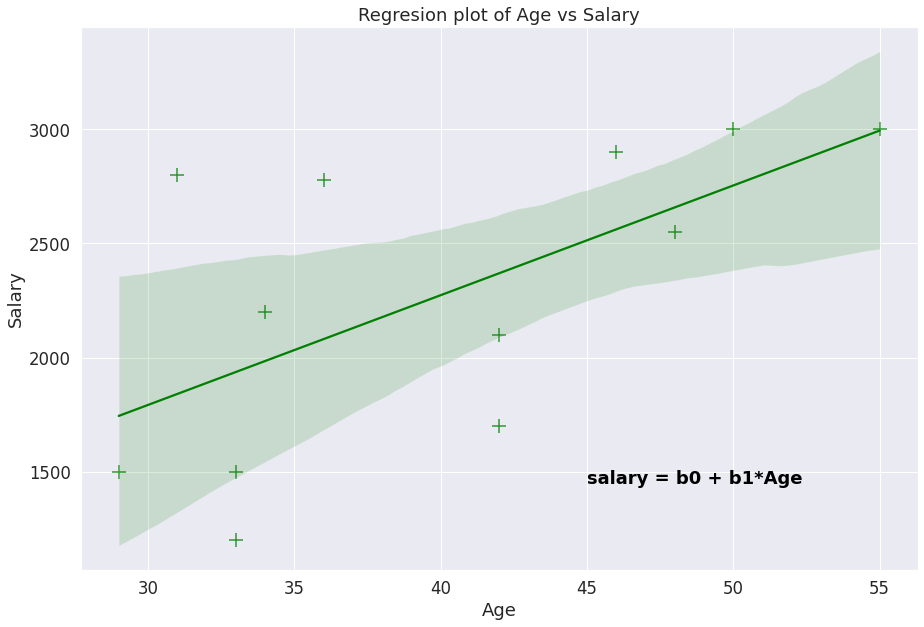

In [32]:
plt.figure(figsize= (15,10)) #tamaño de la tabla 
sns.set(font_scale = 1.50) #tamaño de las letras
ax = sns.regplot(x = 'Age',
                 y = 'Salary',
                 data = df,
                 color = 'green', #color de la tabla 
                 marker = '+', #forma del marcador 
                 scatter_kws = {'s':200} #tamaño del marcador
)
ax.set(xlabel = 'Age',
       ylabel = 'Salary') #poner marca de que va en cada axia

ax.text(45,1450, 'salary = b0 + b1*Age',
        horizontalalignment= 'left', size = 'medium', color = 'black',
        weight = 'semibold')
ax.set_title('Regresion plot of Age vs Salary') #titulo de la grafica 
plt.show 

In [36]:
RESI_A

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64

In [35]:
predicted_values = resultA.fittedvalues.to_frame()
predicted_values

,0
0,1936.521924
1,1936.521924
2,1984.615140
3,2369.360866
4,1744.149060
5,2369.360866
6,2754.106593
7,2994.572672
8,1840.335492
9,2561.733730


<function matplotlib.pyplot.show>

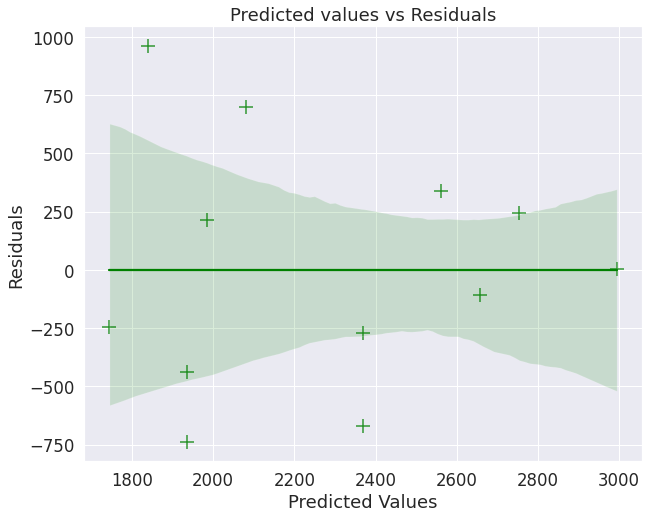

In [41]:
plt.figure(figsize= (10,8)) #tamaño de la tabla 
sns.set(font_scale = 1.50) #tamaño de las letras
ax = sns.regplot(x = predicted_values,
                 y = RESI_A,
                 data = df,
                 color = 'green', #color de la tabla 
                 marker = '+', #forma del marcador 
                 scatter_kws = {'s':200} #tamaño del marcador
)
ax.set(xlabel = 'Predicted Values',
       ylabel = 'Residuals')
ax.set_title('Predicted values vs Residuals')
plt.show 

In [42]:
df.columns

Index(['Gender', 'Salary', 'Age', 'Place', 'Weight', 'Company',
       'Academic_degree'],
      dtype='object')

In [44]:
modelA =sm.OLS.from_formula('Salary~Age+Gender', data = df)
resultA = modelA.fit()
resultA.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0945
Time:                        14:37:51   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Salary = b0 + b1*age + b2*(Gender_ male + Gender_female)

Salary = 749 + 34 * Age + 306 * Gender[T.Male]

What is the salary of a male with age 42?




In [45]:
print('The salary of a male with age 42 =', 749 + 34*42 + 306*1)
print('The salary of a female with age 42 = ',749 + 34*42 + 306*0)

The salary of a male with age 42 = 2483
The salary of a female with age 42 =  2177
